# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Rachel/.pyenv/versions/py36_env/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


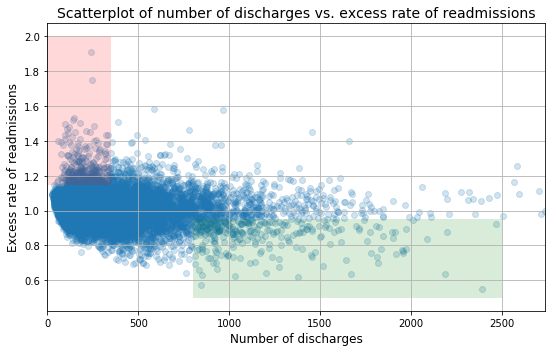

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

# Exercise

## A. Do you agree with the above analysis and recommendations? Why or why not?

I agree with the overall conclusion that hospitals with smaller capacities (< 300) may have higher excess readmission rates.  However, I believe that adequate supporting evidence is not provided in the statistics described above.  Furthermore, there are some concerns regarding the particular subsets of data selected for both the graph and analyses.

With regard to the graph, the red and green boxes on the graph are troublesome.  It is unclear how the analyst determined the values to use for these cut-offs, and this rationale should be made clear.  In addition, these boxes encompass a very small proportion of the overall data set.  The data highlighted in the red box represent 269 hospitals, or 2.34% of the total.  The data in the green box represent 301 hospitals, or 2.62% of the total.  These hospitals may very well be considered outliers, and shouldn't be used to draw conclusions about the entire dataset.

There are also several issues with the subsets of data highlighted in the analyses in part B.  The most obvious issue is that, again, it's unclear why these particular subsets were chosen.  Is there some practical significance to these cut-offs that isn't described?  Furthermore, these subsets have relatively small sample sizes, which makes it inadvisable to draw conclusions from these data about the dataset as a whole.  Specifically, the number of hospitals with fewer than 100 discharges is 1,188, which only represents 10% of the data.  Similarly, the number of hospitals with greater than 1,000 discharges is 460, which only represents 4% of the data.

Finally, the recommendations made are with regard to a subset of hospitals (with fewer than 300 discharges) that is not analyzed in the preceding sections.  If these hospitals are the basis for the recommendations made, they should be included in the analyses.

### Calculations

#### Proportion of hospitals in subset datasets

Calculate proportion of hospitals in red box on scatterplot

In [5]:
df_sub = clean_hospital_read_df[81:-3]
total_n = len(df_sub)

# create dataframe representing red box on graph
red = df_sub[(df_sub['Number of Discharges'] >= 350) &
             (df_sub['Excess Readmission Ratio'] >= 1.15) &
             (df_sub['Excess Readmission Ratio'] <= 2)]

red_n = len(red)
red_perc = 100 * round(red_n / total_n,4)

print('Number of hospitals in red area: ' + str(red_n) + ' (' + str(red_perc) + '%)')

Number of hospitals in red area: 269 (2.34%)


Calculate proportion of hospitals in green box on scatterplot

In [6]:
# create dataframe representing green box on graph
green = df_sub[(df_sub['Number of Discharges'] >= 800) &
               (df_sub['Number of Discharges'] <= 2500) &
               (df_sub['Excess Readmission Ratio'] >= 0.5) &
               (df_sub['Excess Readmission Ratio'] <= 0.95)]

green_n = len(green)
green_perc = 100 * round(green_n / total_n,4)

print('Number of hospitals in green area: ' + str(green_n) + ' (' + str(green_perc) + '%)')

Number of hospitals in green area: 301 (2.62%)


Calculate proportion of hospitals with fewer than 100 discharges

In [7]:
df_under100 = df_sub[df_sub['Number of Discharges'] < 100]
df_under100_perc = 100 * (len(df_under100) / len(df_sub))
df_under100_perc = round(df_under100_perc,2)
print('Number of hospitals: ' + str(len(df_under100)) + ' (' + str(df_under100_perc) + '%)')

Number of hospitals: 1188 (10.34%)


Calculate proportion of hospitals with more than 1,000 discharges

In [8]:
df_over1000 = df_sub[df_sub['Number of Discharges'] > 1000]
df_over1000_perc = 100 * (len(df_over1000) / len(df_sub))
df_over1000_perc = round(df_over1000_perc,2)
print('Number of hospitals: ' + str(len(df_over1000)) + ' (' + str(df_over1000_perc) + '%)')

Number of hospitals: 460 (4.0%)


Calculate proportion of hospitals with fewer than 300 discharges

In [9]:
df_under300 = df_sub[df_sub['Number of Discharges'] < 300]
df_under300_perc = 100 * (len(df_under300) / len(df_sub))
df_under300_perc = round(df_under300_perc,2)
print('Number of hospitals: ' + str(len(df_under300)) + ' (' + str(df_under300_perc) + '%)')

Number of hospitals: 6108 (53.14%)


#### Mean excess readmission ratio and percent with ratios over 1

Calculate mean excess readmission ratio and percent with excess ratios over 1 for all hospitals

In [10]:
df_mean_exreadmin = round(np.mean(df_sub['Excess Readmission Ratio']),3)
print('Mean excess readmission ratio: ' + str(df_mean_exreadmin))

df_over1 = df_sub[df_sub['Excess Readmission Ratio'] > 1]
df_over1_perc = 100 * (len(df_over1) / len(df_sub))
df_over1_perc = round(df_over1_perc,2)
print('Percent with excess readmission rate over 1: ' + str(df_over1_perc) + '%')

Mean excess readmission ratio: 1.008
Percent with excess readmission rate over 1: 51.66%


Calculate mean excess readmission ratio and percent with excess ratios over 1 for hospitals with fewer than 100 discharges

In [11]:
df_under100_mean_exreadmin = round(np.mean(df_under100['Excess Readmission Ratio']),3)
print('Mean excess readmission ratio: ' + str(df_under100_mean_exreadmin))

df_under100_over1 = df_under100[df_under100['Excess Readmission Ratio'] > 1]
df_under100_over1_perc = 100 * (len(df_under100_over1) / len(df_under100))
df_under100_over1_perc = round(df_under100_over1_perc,2)
print('Percent with excess readmission rate over 1: ' + str(df_under100_over1_perc) + '%')

Mean excess readmission ratio: 1.023
Percent with excess readmission rate over 1: 63.22%


Calculate mean excess readmission ratio and percent with excess ratios over 1 for hospitals with more than 1,000 discharges

In [12]:
df_over1000_mean_exreadmin = round(np.mean(df_over1000['Excess Readmission Ratio']),3)
print('Mean excess readmission ratio: ' + str(df_over1000_mean_exreadmin))

df_over1000_over1 = df_over1000[df_over1000['Excess Readmission Ratio'] > 1]
df_over1000_over1_perc = 100 * (len(df_over1000_over1) / len(df_over1000))
df_over1000_over1_perc = round(df_over1000_over1_perc ,2)
print('Percent with excess readmission rate over 1: ' + str(df_over1000_over1_perc) + '%')

Mean excess readmission ratio: 0.979
Percent with excess readmission rate over 1: 44.57%


Calculate mean excess readmission ratio and percent with excess ratios over 1 for hospitals with fewer than 300 discharges

In [13]:
df_under300_mean_exreadmin = round(np.mean(df_under300['Excess Readmission Ratio']),3)
print('Mean excess readmission ratio: ' + str(df_under300_mean_exreadmin))

df_under300_over1 = df_under300[df_under300['Excess Readmission Ratio'] > 1]
df_under300_over1_perc = 100 * (len(df_under300_over1) / len(df_under300))
df_under300_over1_perc = round(df_under300_over1_perc,2)
print('Percent with excess readmission rate over 1: ' + str(df_under300_over1_perc) + '%')

Mean excess readmission ratio: 1.014
Percent with excess readmission rate over 1: 53.75%


### Data summary

|                            | All    | Under 100 Discharges | Over 1,000 Discharges | Under 300 Discharges |
|----------------------------|--------|----------------------|-----------------------|----------------------|
| n                          | 11,494 | 1,188                | 466                   | 6,108                |
| Mean Excess Readmin Ratio  | 1.008  | 1.023                | 0.979                 | 1.014                |
| % Excess Readmin Ratio > 1 | 51.66% | 63.22%               | 44.57%                | 53.75%               |

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test

** Null Hypothesis **

There is no significant difference between the mean excess readmission ratio for hospitals with more than 300 discharges versus hospitals with fewer than 300 discharges

** Alternative Hypothesis **

The mean excess readmission ratio for hospitals with fewer than 300 discharges is significantly different from the mean for hospitals with more than 300 discharges

### 2. Compute and report the observed significance value (or p-value).

In [14]:
df_over300 = df_sub[df_sub['Number of Discharges'] >= 300]

test_stat, pval = stats.ttest_ind(df_under300['Excess Readmission Ratio'],
                                  df_over300['Excess Readmission Ratio'])

print('p = ' + str(round(pval,20)))

p = 8.002e-17


### 3. Report statistical significance for $\alpha$ = .01. 

The p-value is less than .01.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The results from these analyses indicate that there is a statistically significant difference between the rate of excess readmissions for hospitals with more than 300 discharges compared to hospitals with fewer than 300 discharges.  These findings do support the initial analyst's claim that hospitals with small capacity (< 300) may have higher excess readmission rates.  However, there are a number of limitations to the conclusions that can be drawn from this finding that may have practical significance.

For example, it is unclear that the number of discharges a hospital has corresponds directly to their capacity.  Other measures may be more appropriate and should be taken into account.  Similarly, it should be explained why the cut-off of 300 discharges was chosen.

In addition, these findings don't consider other characteristics of hospitals that may suggest smaller facilities should remain open.  For instance, consolidating hospitals and facilities may leave individuals in less populated areas without a nearby hospital.

As a result, I support the recommendation that hospitals with small capacity upgrade their resource allocation for quality care, but I do not agree with the recommendation that hospitals should be consolidated based solely on these analyses.

### 5. Look at the scatterplot above

#### What are the advantages and disadvantages of using this plot to convey information?

* Advantages

    * Show outliers in the data
    * Show general spread and distribution of the data

* Disadvantages

    * Hard to discern patterns/relationships, if they exist

#### Construct another plot that conveys the same information in a more direct manner.

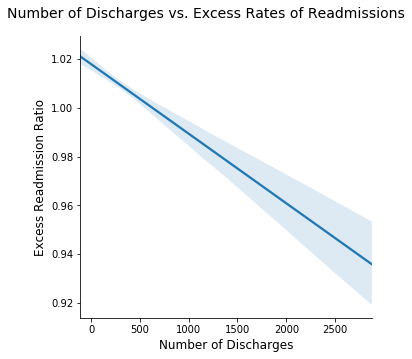

In [15]:
import seaborn as sns

g = sns.lmplot(x="Number of Discharges", y="Excess Readmission Ratio", scatter = False, data=df_sub)

# Remove the top and right line in graph
sns.despine()

# Adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Number of Discharges vs. Excess Rates of Readmissions', fontsize=14)

# Set the xlabel of the graph from here
g.set_xlabels("Number of Discharges",size = 12)

# Set the ylabel of the graph from here
g.set_ylabels("Excess Readmission Ratio",size = 12)